In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 12})

In [2]:
theta2_graus = [32.62, 34.86, 37.08, 48.34, 63.68, 69.30, 73.18, 82.24, 100.16, 105.24]
theta2 = np.radians(np.array(theta2_graus))
sin2_theta = np.sin(theta2/2)**2

llambda = 1.5405e-10
d = (np.sqrt((llambda**2)/(4*sin2_theta)))
d

array([2.74272129e-10, 2.57143953e-10, 2.42242398e-10, 1.88120324e-10,
       1.46005394e-10, 1.35473388e-10, 1.29218203e-10, 1.17123662e-10,
       1.00431429e-10, 9.69323218e-11])

### Dados de ângulos de pico do Magnésio

## Hexagonal Close Packed - Magnésio

$$
\frac{1}{d^{2}}=\frac{4}{3}\left(\frac{h^{2}+h k+k^{2}}{a^{2}}\right)+\frac{l^{2}}{c^{2}}=\frac{4 \sin ^{2} \theta}{\lambda^{2}}
$$

$$\Downarrow$$

$$
2 \log d=2 \log a-\log \left[\frac{4}{3}\left(h^{2}+h k+k^{2}\right)+\frac{l^{2}}{(c / a)^{2}}\right]
$$

In [3]:
def s(h, k, l, c_a):
    return (4/3*(h**2+h*k+k**2)+(l**2)/(c_a**2))

In [4]:
c_a = np.linspace(0.5,2, 500)

In [5]:
hkl = [(1,0,0),(1,0,1),(1,0,2),(1,1,0), (0,0,2),
      (1,0,3),(2,0,0),(1,1,2),(2,0,1),(0,0,4),
      (2,0,2),(1,0,4),(2,0,3),(2,1,0)]

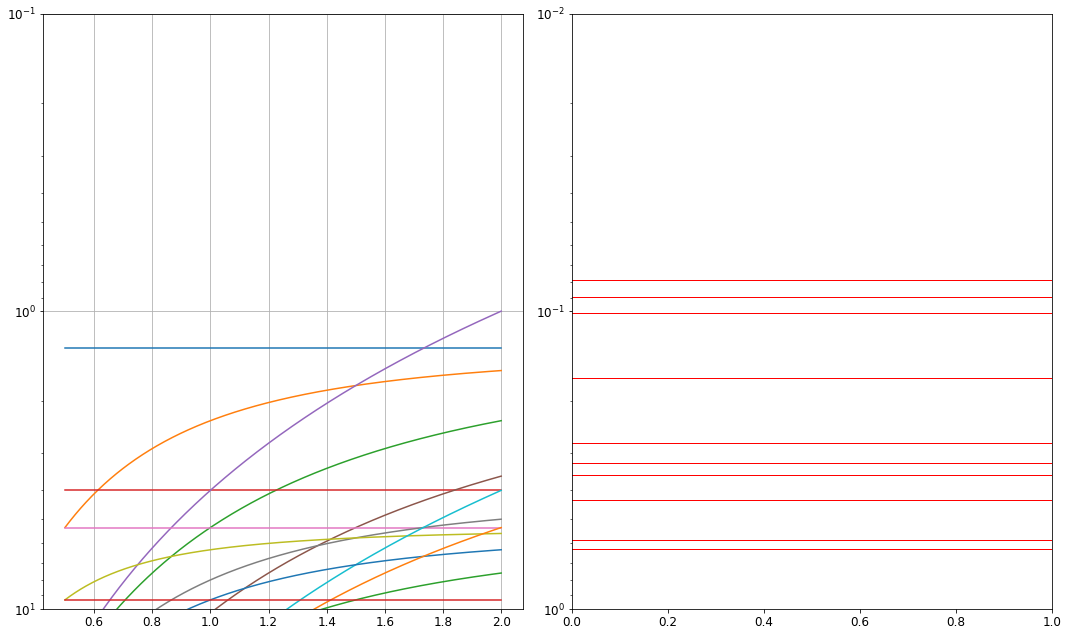

In [6]:
fig, ax0 = plt.subplots(1, 2, figsize=(15, 9))

ax = ax0[0]
for aux in hkl:
    h, k, l = aux
    y = s(h, k, l, c_a)
    ax.semilogy(c_a, y, label = 'hkl = '+str(aux[0])+str(aux[1])+str(aux[2]))

ax.set_ylim(0.1, 10)
ax.grid(True)
ax.invert_yaxis()

tax = ax0[1]

for aux in sin2_theta:
    tax.axhline(aux, color = 'r', linestyle = '-', linewidth = 1)
    
tax.set_yscale('log')
tax.set_ylim(0.01, 1)
tax.invert_yaxis()
#ax.legend(bbox_to_anchor=(1.07, 0.5), loc="center left", borderaxespad=0)

plt.tight_layout()

plt.savefig('hull-davey_completo.png', dpi=300)